# Building a Handwritten Digits Classifier
Deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade.
In this project, we'll build models that can classify handwritten digits. We'll train, test, and improve a few different deep neural networks for image classification. 

## Working with Image Data
We'll be utilizing the handwritten digits dataset from UCI through the `sklearn.datasets.load_digits()` function.

Each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions of 8x8 pixels. Once the data is in the right shape, we can visualize it using the `pyplot.imshow()` function.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
import pandas as pd

data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
col_names = pd.Series(digits['feature_names'])
data = data.rename(columns=col_names)
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
label = pd.Series(digits['target'])
label.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
#combining features and target data into one df
data = pd.concat([data, label], axis=1)
data = data.rename({0: 'label'}, axis=1)
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


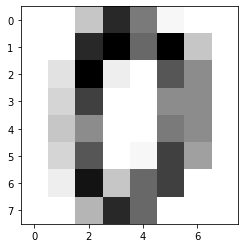

In [6]:
#visualizing the first image in data
import matplotlib.pyplot as plt
%matplotlib inline

img = data.iloc[0]
img = img.drop('label')
np_img = img.values
np_img = np_img.reshape(8,8)
plt.imshow(np_img, cmap='Greys')

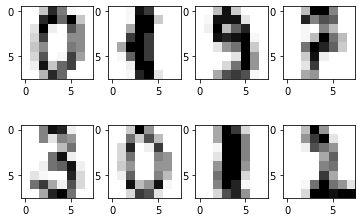

In [7]:
#visualizing various images in data
fig, ax = plt.subplots(2,4)

imgs_rows = [0,99,199,299,999,1099,1199,1299]
count = 0
for i in range(2):
    for j in range(4):
        img = data.iloc[imgs_rows[count]].drop('label')
        np_img = img.values.reshape(8,8)
        ax[i,j].imshow(np_img, cmap="Greys")
        count = count + 1

## K-Nearest Neighbors Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(n_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    df = pd.DataFrame()
    df['correct_label'] = test_labels
    df['predicted_label'] = predictions
    accuracy = sum(df['correct_label'] == df['predicted_label']) / len(df)
    return accuracy

def cross_validate_knn(k):
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    fold_accuracies = []
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = data['label'].loc[train_index], data['label'].loc[test_index]
        
        model = train_knn(k, X_train, y_train)
        accuracy = test(model, X_test, y_test)
        fold_accuracies.append(accuracy)
    return fold_accuracies

Now, let's experiment with different values for `k`.

([<matplotlib.axis.XTick at 0x7fde51457940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

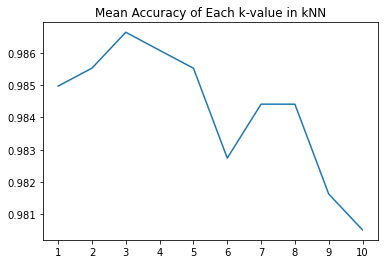

In [9]:
import numpy as np

k_vals = range(1,11)
k_mean_accuracies = []
for k in k_vals:
    kfold_accuracies = cross_validate_knn(k)
    mean_accuracy = np.mean(kfold_accuracies)
    k_mean_accuracies.append(mean_accuracy)
    
plt.plot(k_vals, k_mean_accuracies)
plt.title("Mean Accuracy of Each k-value in kNN")
plt.xticks(range(1,11))

In [10]:
max_index = k_mean_accuracies.index(np.max(k_mean_accuracies)) + 1
max_index, np.max(k_mean_accuracies)

(3, 0.9866419203167534)

There are a few downsides to using k-nearest neighbors. kNN has high memory usage and there's no model representation to debug and explore.

Let's now try a neural network with a single hidden layer.

## Neural Network with One Hidden Layer

In [11]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_tuple, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=neuron_tuple, activation='logistic', max_iter=1000, random_state=1) #logistic since it's common in nn classification tasks
    nn.fit(train_features, train_labels)
    return nn

#same test() as earlier
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    df = pd.DataFrame()
    df['correct_label'] = test_labels
    df['predicted_label'] = predictions
    accuracy = sum(df['correct_label'] == df['predicted_label']) / len(df)
    return accuracy

def cross_validate_nn(neuron_tuple):
    kf = KFold(n_splits=4, shuffle=True, random_state=2)
    fold_accuracies = []
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = data['label'].loc[train_index], data['label'].loc[test_index]
        
        model = train_nn(neuron_tuple, X_train, y_train)
        accuracy = test(model, X_test, y_test)
        fold_accuracies.append(accuracy)
    return fold_accuracies

In [12]:
tuples = []
for i in range(6):
    n_neurons = 8*(2**i)
    tuples.append((n_neurons,))
tuples

[(8,), (16,), (32,), (64,), (128,), (256,)]

In [13]:
#np.random.seed(2)

nn_1_mean_accuracies = []
for tuple_ in tuples:
    kfold_accuracies = cross_validate_nn(tuple_)
    mean_accuracy = np.mean(kfold_accuracies)
    nn_1_mean_accuracies.append(mean_accuracy)

([<matplotlib.axis.XTick at 0x7fde612541c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

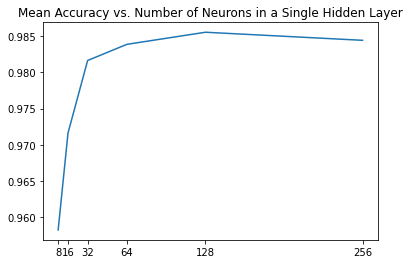

In [14]:
x = [tuple_[0] for tuple_ in tuples]
plt.plot(x, nn_1_mean_accuracies)
plt.title("Mean Accuracy vs. Number of Neurons in a Single Hidden Layer")
plt.xticks(x)

In [15]:
max_index = nn_1_mean_accuracies.index(np.max(nn_1_mean_accuracies))
x[max_index], np.max(nn_1_mean_accuracies)

(128, 0.9855382331106162)

In [16]:
nn_1_mean_accuracies

[0.9582677555060628,
 0.9716245978718139,
 0.9816406829992577,
 0.9838703291264539,
 0.9855382331106162,
 0.9844258846820095]

It looks like adding more neurons to the single hidden layer improved simple accuracy from 95% to about 98% (and slightly increased from then on with significantly more neurons). Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that our best k-NN model achieved 98.66% accuracy, there doesn't seem to be any advantage to using a single hidden layer neural network for a handwritten digits classifier. 

Let's now try two hidden layers.

## Neural Network with Two Hidden Layers
Adding more neurons to a single hidden layer vastly improved the classification accuracy. Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [17]:
tuples = []
for i in range(3):
    n_neurons = 64*(2**i)
    tuples.append((n_neurons,n_neurons))
tuples

[(64, 64), (128, 128), (256, 256)]

In [18]:
nn_2_mean_accuracies = []
for tuple_ in tuples:
    kfold_accuracies = cross_validate_nn(tuple_)
    mean_accuracy = np.mean(kfold_accuracies)
    nn_2_mean_accuracies.append(mean_accuracy)

([<matplotlib.axis.XTick at 0x7fde61185fa0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

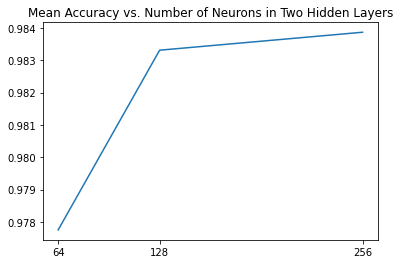

In [19]:
x = [tuple_[0] for tuple_ in tuples]
plt.plot(x, nn_2_mean_accuracies)
plt.title("Mean Accuracy vs. Number of Neurons in Two Hidden Layers")
plt.xticks(x)

In [20]:
nn_2_mean_accuracies

[0.977750556792873, 0.9833135362534027, 0.9838690918089581]

Using two hidden layers improved our accuracy with fewer neurons compared to the one hidden layer.

## Neural Network with Three Hidden Layers

In [21]:
def cross_validate_nn(neuron_tuple):
    kf = KFold(n_splits=6, shuffle=True, random_state=1)
    fold_accuracies = []
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = data['label'].loc[train_index], data['label'].loc[test_index]
        
        model = train_nn(neuron_tuple, X_train, y_train)
        accuracy = test(model, X_test, y_test)
        fold_accuracies.append(accuracy)
    return fold_accuracies

In [22]:
tuples = [(10,10,10)]
for i in range(2):
    n_neurons = 64*(2**i)
    tuples.append((n_neurons,n_neurons, n_neurons))
tuples

[(10, 10, 10), (64, 64, 64), (128, 128, 128)]

In [23]:
nn_3_mean_accuracies = []
for tuple_ in tuples:
    kfold_accuracies = cross_validate_nn(tuple_)
    mean_accuracy = np.mean(kfold_accuracies)
    nn_3_mean_accuracies.append(mean_accuracy)

([<matplotlib.axis.XTick at 0x7fde513f09a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

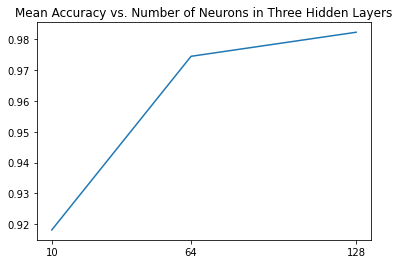

In [24]:
x = [tuple_[0] for tuple_ in tuples]
plt.plot(x, nn_3_mean_accuracies)
plt.title("Mean Accuracy vs. Number of Neurons in Three Hidden Layers")
plt.xticks(x)

In [25]:
nn_3_mean_accuracies

[0.9181884057971015, 0.9744091415830546, 0.9821999256781866]

It seems like the more hidden layers we add, the more neurons we need to have a good accuracy.

So far, the best mean accuracy we've achieved is 98.55% using one hidden layer and 128 neurons. It seems that there is a tradeoff between the number of hidden layers and the number of neurons. 